<a href="https://colab.research.google.com/github/Jesgreg/PROM_M/blob/main/Voice_commands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-e52770827b3b>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


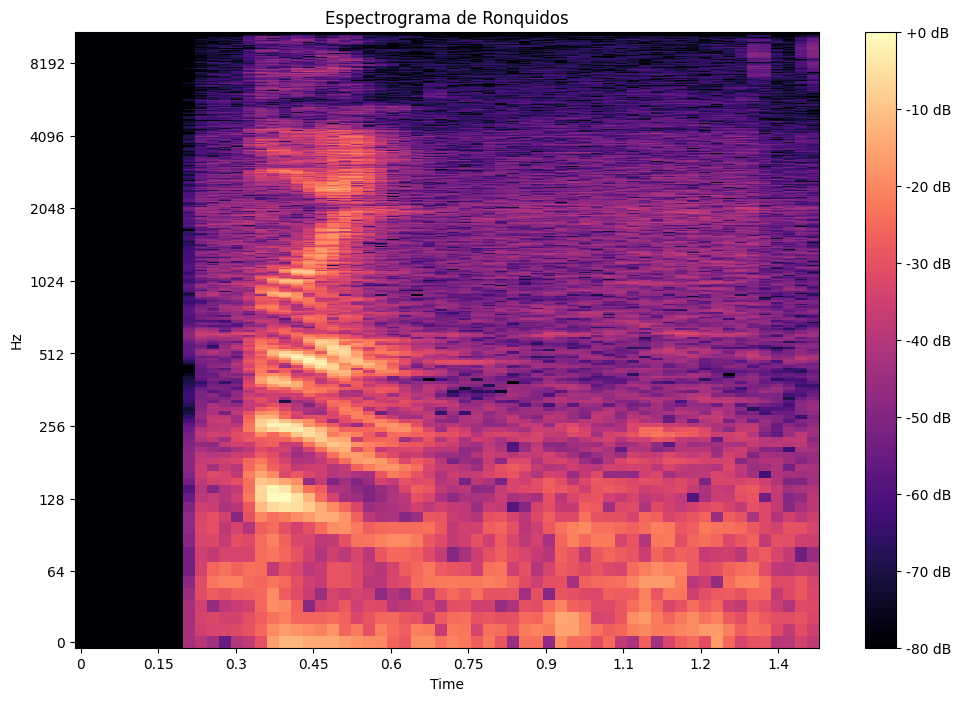

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_file = '/content/drive/MyDrive/PROM/test/play/untitled.wav'

# Carga el archivo de audio
y, sr = librosa.load(audio_file)

# Genera el espectrograma
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Muestra el espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma audio')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import os
import librosa
import numpy as np
from librosa.util import normalize

# Definir listas para almacenar espectrogramas y etiquetas
spectrogram_list = []
labels_list = []

# Lista de palabras
palabras = ["play", "pause", "next", "back", "shuffle", "empty"]

# Carpeta de entrenamiento
train_folder = '/content/drive/MyDrive/PROM/train'

# Recorre las carpetas de entrenamiento
for i, palabra in enumerate(palabras):
    folder_path = os.path.join(train_folder, palabra)

    # Recorre los archivos de audio en cada carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(folder_path, filename)
            audio, _ = librosa.load(filepath, sr=None)
            spectrogram = librosa.feature.melspectrogram(y=audio, sr=44100)
            spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
            # Ajusta la longitud a 128
            if spectrogram.shape[1] < 128:
                pad_width = 128 - spectrogram.shape[1]
                spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
            else:
                spectrogram = spectrogram[:, :128]
            spectrogram_list.append(spectrogram)
            labels_list.append(i)  # Etiqueta i para la palabra actual

# Convierte las listas de espectrogramas y etiquetas en matrices de datos
X_train = np.array(spectrogram_list)
y_train = np.array(labels_list)

# Carpeta de prueba
test_folder = '/content/drive/MyDrive/PROM/test'

# Definir listas para almacenar espectrogramas y etiquetas de prueba
spectrogram_test_list = []
labels_test_list = []

# Recorre las carpetas de prueba
for i, palabra in enumerate(palabras):
    folder_path = os.path.join(test_folder, palabra)

    # Recorre los archivos de audio en cada carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(folder_path, filename)
            audio, _ = librosa.load(filepath, sr=None)
            spectrogram = librosa.feature.melspectrogram(y=audio, sr=44100)
            spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
            # Ajusta la longitud a 128
            if spectrogram.shape[1] < 128:
                pad_width = 128 - spectrogram.shape[1]
                spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
            else:
                spectrogram = spectrogram[:, :128]
            spectrogram_test_list.append(spectrogram)
            labels_test_list.append(i)  # Etiqueta i para la palabra actual

# Convierte las listas de prueba en matrices de datos
X_test = np.array(spectrogram_test_list)
y_test = np.array(labels_test_list)

# Añadir una dimensión adicional para el canal
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

# Define el modelo de aprendizaje automático
model = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(6, activation='softmax')  # Se cambió a 6 neuronas y activación softmax
])

# Compila el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=15)

# Evalúa el modelo
score = model.evaluate(X_test, y_test, verbose=0)
# Imprime las métricas
print('Pérdida en el conjunto de prueba:', score[0])
print('Precisión en el conjunto de prueba:', score[1])
##print('Evaluación del modelo:', score)
model.save('/content/drive/MyDrive/PROM/voice.h5')


Epoch 1/15
3/3 [==============================] - 2s 435ms/step - loss: 359.4652 - accuracy: 0.1429
Epoch 2/15
3/3 [==============================] - 1s 398ms/step - loss: 1079.4761 - accuracy: 0.1978
Epoch 3/15
3/3 [==============================] - 1s 299ms/step - loss: 663.3442 - accuracy: 0.1538
Epoch 4/15
3/3 [==============================] - 1s 230ms/step - loss: 287.1176 - accuracy: 0.1648
Epoch 5/15
3/3 [==============================] - 1s 217ms/step - loss: 153.7133 - accuracy: 0.2967
Epoch 6/15
3/3 [==============================] - 1s 210ms/step - loss: 131.3632 - accuracy: 0.2198
Epoch 7/15
3/3 [==============================] - 1s 210ms/step - loss: 141.9244 - accuracy: 0.1648
Epoch 8/15
3/3 [==============================] - 1s 206ms/step - loss: 87.5684 - accuracy: 0.3187
Epoch 9/15
3/3 [==============================] - 1s 192ms/step - loss: 67.0623 - accuracy: 0.4066
Epoch 10/15
3/3 [==============================] - 1s 196ms/step - loss: 37.2518 - accuracy: 0.5275
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/PROM/voice.h5')


In [5]:
from tensorflow import keras

# Cargar el modelo guardado
model = keras.models.load_model('/content/drive/MyDrive/PROM/voice.h5')

# Ejemplo de cómo hacer una predicción en un espectrograma (X_new es tu nuevo espectrograma)
# prediction = model.predict(X_new)

# Puedes ajustar 'X_new' según tus necesidades y datos de entrada.

# Visualizar la arquitectura del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_1 (Dense)             (None, 6)                 762054    
                                                                 
Total params: 762374 (2.91 MB)
Trainable params: 762374 (2.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
import librosa

audio_file_path = '/content/drive/MyDrive/PROM/test/play/untitled.wav'
audio, _ = librosa.load(audio_file_path, sr=44100)  # Asegúrate de que la tasa de muestreo sea la misma que usaste durante el entrenamiento.


In [7]:
import librosa

spectrogram = librosa.feature.melspectrogram(y=audio, sr=44100)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Ajusta la longitud a 128 (o la longitud que usaste durante el entrenamiento)
if spectrogram.shape[1] < 128:
    pad_width = 128 - spectrogram.shape[1]
    spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
else:
    spectrogram = spectrogram[:, :128]


In [8]:
spectrogram = spectrogram[:, :, np.newaxis]


In [14]:
import librosa
import numpy as np

# Cargar el archivo de audio que deseas probar
audio_path = '/content/drive/MyDrive/PROM/test/play/untitled.wav'
audio, _ = librosa.load(audio_path, sr=None)

# Procesar el archivo de audio (similar a la preparación de datos de entrenamiento)
spectrogram = librosa.feature.melspectrogram(y=audio, sr=44100)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
if spectrogram.shape[1] < 128:
    pad_width = 128 - spectrogram.shape[1]
    spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
else:
    spectrogram = spectrogram[:, :128]

# Añadir una dimensión adicional para el canal
input_data = spectrogram[np.newaxis, :, :, np.newaxis]

# Hacer la predicción con el modelo
predictions = model.predict(input_data)

# Obtener la clase predicha
predicted_class = np.argmax(predictions)

# Mapear la clase predicha a la categoría correspondiente
categorias = ["play", "pause", "next", "back", "shuffle", "empty"]
categoria_predicha = categorias[predicted_class]

# Imprimir la categoría predicha
print(f'El audio se clasifica como: {categoria_predicha}')


1/1 [==============================] - 0s 29ms/step
El audio se clasifica como: play


In [15]:
import os

model_file = '/content/drive/MyDrive/PROM/voice.h5'
if os.path.exists(model_file):
    print(f"El archivo '{model_file}' existe en la ruta especificada.")
else:
    print(f"El archivo '{model_file}' no se encuentra en la ruta especificada.")


El archivo '/content/drive/MyDrive/PROM/voice.h5' existe en la ruta especificada.


In [16]:
import tensorflow as tf

# Cargar el modelo entrenado
model = tf.keras.models.load_model('/content/drive/MyDrive/PROM/voice.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo convertido en un archivo .tflite
with open('ronquidos_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [17]:
import tensorflow as tf

# Cargar el modelo .h5
model = tf.keras.models.load_model('/content/drive/MyDrive/PROM/voice.h5')

# Obtener los pesos del modelo y mostrarlos en pantalla
pesos = model.get_weights()
for i, peso in enumerate(pesos):
    print(f'Capa {i + 1} - Forma: {peso.shape}')
    print(peso)


Capa 1 - Forma: (3, 3, 1, 32)
[[[[ 0.10506658 -0.02936417 -0.04541537  0.01045422 -0.07814511
    -0.06615828  0.07975693 -0.00093982  0.1288793  -0.08339635
     0.0820802  -0.08691268  0.12389343  0.00314945 -0.00257101
    -0.0166551  -0.06807632  0.1208235   0.08409665  0.05427526
     0.13381602 -0.15217657  0.10266665 -0.07716308 -0.01056741
     0.04924188  0.01214864  0.10400984 -0.01407347  0.03412469
     0.04775577 -0.07472124]]

  [[-0.06807573  0.10694914 -0.00324173  0.10075907 -0.05647272
     0.02185982  0.09117065 -0.04838643 -0.025552   -0.02271396
    -0.05318232  0.00616657 -0.05233106 -0.01123109  0.13866703
     0.05597595  0.03514014  0.07717101 -0.01757712  0.0571891
     0.10210517  0.11692913 -0.11543752  0.0371012  -0.06991652
    -0.1101187   0.02069335  0.10038486  0.04121449  0.10181466
    -0.02072649  0.04374399]]

  [[-0.0827508   0.07338879 -0.08851241 -0.14013179 -0.03461963
    -0.06956798  0.05897925 -0.03443187  0.10483158 -0.1143059
     0.1095121

In [18]:
# Convierta el modelo al formato TensorFlow Lite sin cuantificación
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo en el disco
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("La dimensión del modelo es:  %d bytes" % basic_model_size)

La dimensión del modelo es:  3051848 bytes


In [19]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nAbra el panel lateral (actualice si es necesario). Haga doble clic en model.h para descargar el archivo.")

Header file, model.h, is 18,819,764 bytes.

Abra el panel lateral (actualice si es necesario). Haga doble clic en model.h para descargar el archivo.
